In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 32

In [4]:
def processFile(fname):
    df = pd.read_csv(fname, sep='\t', header=None)
    df.columns = ['time','node','message']
    filtered_df = df[~df['message'].str.contains('DEBUG')]
    latency = filtered_df[filtered_df['message'].str.contains('full completion latency')].copy()
    latency['lat'] = latency['message'].str.extract(r'(\d+\s*ms)')[0]
    latency['node'] = latency['node'].str.strip('ID:').astype(int)
    latency['round'] = latency['message'].str.extract(r'rd (\d+)')[0].str.strip('rd ').astype(int)
    latency.replace({'message' : r'(\d+\s*ms)', 'lat':' ms'}, {'message' : '', 'lat':''},regex=True,inplace=True)
    latency['lat'] = latency['lat'].astype(int)

    latency = latency[latency['lat']!=0]
    
    # make the first round 0
    latency['round'] -= (latency['round'].min()-1)
    return latency

In [5]:
# def simpleProcessFile(fname):
#     df = pd.read_csv(fname, sep='\t', header=None)
#     df.columns = ['time','node','message']
#     filtered_df = df[~df['message'].str.contains('DEBUG')]
#     latency = filtered_df[filtered_df['message'].str.contains('full completion latency')].copy()
#     latency['lat'] = latency['message'].str.extract(r'(\d+\s*ms)')[0]
#     latency['node'] = latency['node'].str.strip('ID:').astype(int)
#     latency['round'] = latency['message'].str.extract(r'rd (\d+)')[0].str.strip('rd ').astype(int)
#     latency.replace({'message' : r'(\d+\s*ms)', 'lat':' ms'}, {'message' : '', 'lat':''},regex=True,inplace=True)
#     latency['lat'] = latency['lat'].astype(int)
#     return latency

In [5]:
# excepts files as i_log_32n.txt
def getBigDF(n):
    frames = []
    max_round = 0
    for i in range(1,1024):
        fname = f"exp_logs/{i}_log_{n}n.txt"
        try:
            t = processFile(fname)
            print(f'processed {i}')
        except FileNotFoundError:
            break
        # print(f"biggest t originally {t['round'].max()}")
        if t.empty:
            print('t empty in file ',i )
            continue
        t['round'] += max_round
        max_round = t['round'].max()
        t = t[t['round']!=max_round]
        max_round-=1
        frames.append(t)
        # print(f"after adjustment biggest t {t['round'].max()}")
        print(f'set max_round to {max_round}')
    ret = pd.concat(frames)
    ret['n'] = n
    return ret

In [7]:
df48 = getBigDF(48)

processed 1
set max_round to 88
processed 2
set max_round to 126
processed 3
set max_round to 224


In [6]:
sizes = [4,8,12,16,32,48,64]
# deal with 128 later
all_dfs = []
for N in sizes:
    all_dfs.append(getBigDF(N))
    print(N)

processed 1
set max_round to 458
4
processed 1
set max_round to 241
8
processed 1
set max_round to 105
12
processed 1
set max_round to 251
16
processed 1
set max_round to 75
processed 2
set max_round to 123
32
processed 1
set max_round to 88
processed 2
set max_round to 126
processed 3
set max_round to 224
48
processed 1
set max_round to 20
processed 2
set max_round to 42
processed 3
set max_round to 88
processed 4
t empty in file  4
processed 5
set max_round to 93
processed 6
set max_round to 168
processed 7
set max_round to 182
64


In [7]:
round_completions = [np.array([g['lat'].max() for r, g in df.groupby('round')]) for df in all_dfs]

In [8]:
means = [lat.mean() for lat in round_completions]
stddevs = [np.std(lat) for lat in round_completions]

In [9]:
means

[333.49344978165936,
 350.103734439834,
 421.14285714285717,
 525.7370517928287,
 1005.4065040650406,
 623.4493670886076,
 973.1730769230769]

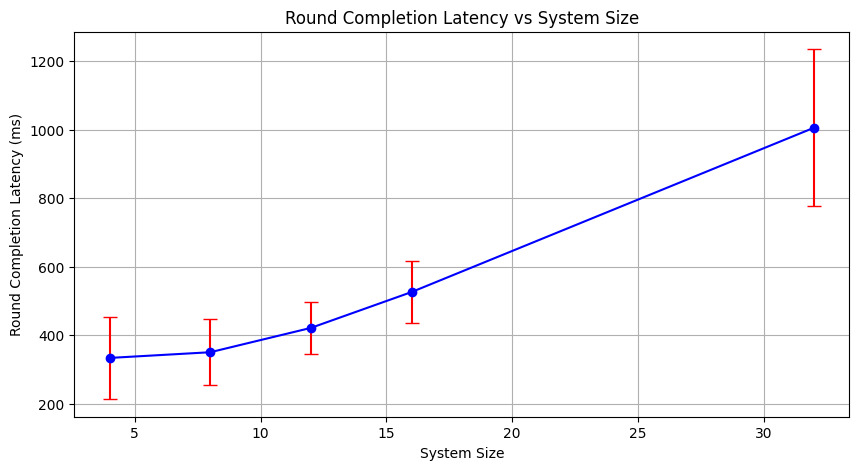

In [10]:
CUTOFF = 5
# Create a plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.errorbar(sizes[:CUTOFF], means[:CUTOFF], yerr=stddevs[:CUTOFF], fmt='o-', ecolor='red', capsize=5, color='blue')
plt.title('Round Completion Latency vs System Size')
plt.xlabel('System Size')
plt.ylabel('Round Completion Latency (ms)')
plt.grid(True)

In [287]:
# test = simpleProcessFile("3_log_48n.txt")

In [9]:
# test[test['lat']!=0]['round'].unique()


NameError: name 'test' is not defined

In [229]:
df = getBigDF(64)

processed 1
set max_round to 20
processed 2
set max_round to 42
processed 3
set max_round to 88
processed 4
processed 5
set max_round to 93
processed 6
set max_round to 168
processed 7
set max_round to 182


In [253]:
df4 = getBigDF(4)
print(df4['round'].unique())

processed 1
set max_round to 458


In [256]:
df8 = getBigDF(8)
print(df8['round'].unique())

processed 1
set max_round to 241
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 2

In [258]:
df16 = getBigDF(16)
print(df16['round'].unique())

processed 1
set max_round to 251
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 2

In [233]:
df64 = df
df32 = getBigDF(32)

processed 1
set max_round to 75
processed 2
set max_round to 123


In [237]:
df12 = getBigDF(12)

processed 1
t empty in file  1


ValueError: No objects to concatenate

In [259]:
max_rd_latency_4 = np.array([g['lat'].max() for r, g in df4.groupby('round')])
max_rd_latency_8 = np.array([g['lat'].max() for r, g in df8.groupby('round')])
max_rd_latency_12 = np.array([g['lat'].max() for r, g in df12.groupby('round')])
max_rd_latency_16 = np.array([g['lat'].max() for r, g in df16.groupby('round')])
max_rd_latency_32 = np.array([g['lat'].max() for r, g in df32.groupby('round')])
max_rd_latency_48 = np.array([g['lat'].max() for r, g in df48.groupby('round')])
max_rd_latency_64 = np.array([g['lat'].max() for r, g in df64.groupby('round')])
# for r, g in df.groupby('round'):
#     print(r, g['lat'].mean())

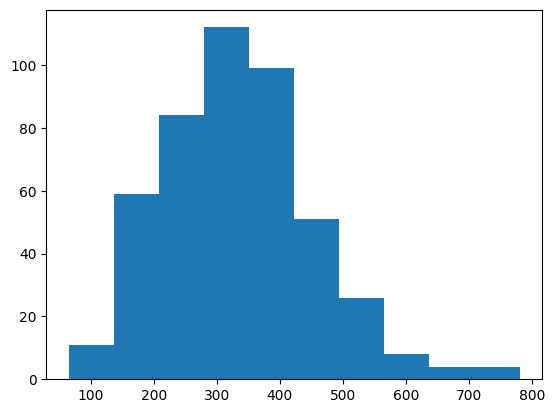

In [261]:
n, bins, patches = plt.hist(max_rd_latency_4)
plt.show()

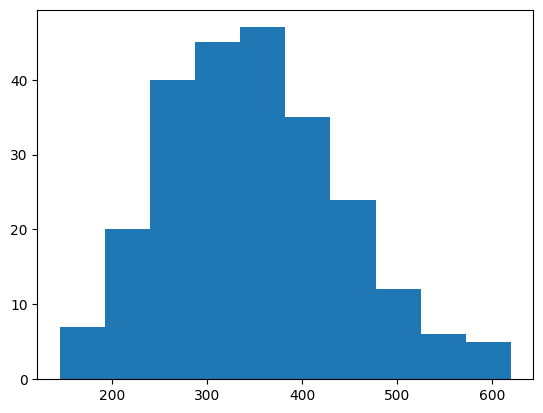

In [262]:
n, bins, patches = plt.hist(max_rd_latency_8)
plt.show()

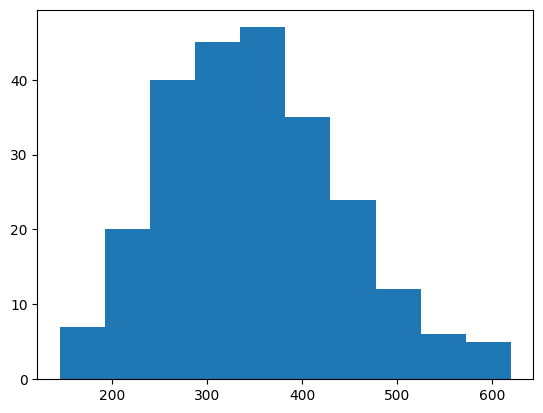

In [ ]:
n, bins, patches = plt.hist(max_rd_latency_12)
plt.show()

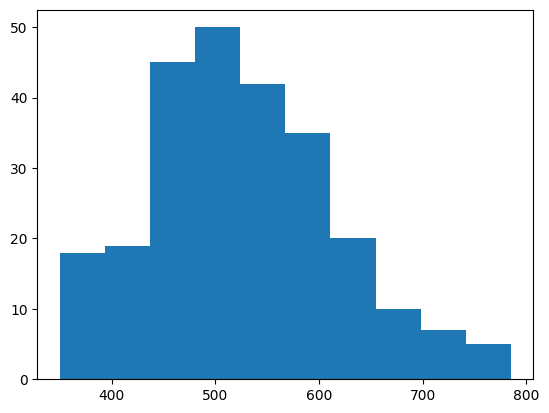

In [263]:
n, bins, patches = plt.hist(max_rd_latency_16)
plt.show()

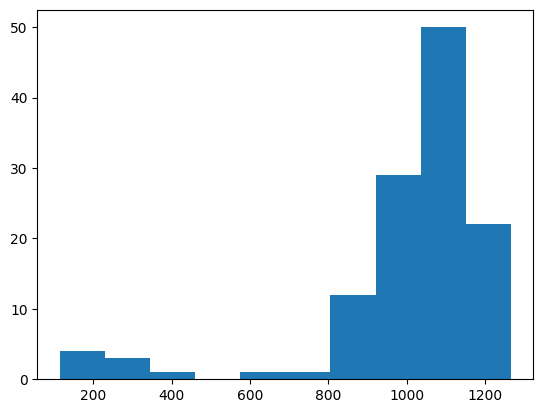

In [264]:
n, bins, patches = plt.hist(max_rd_latency_32)
plt.show()

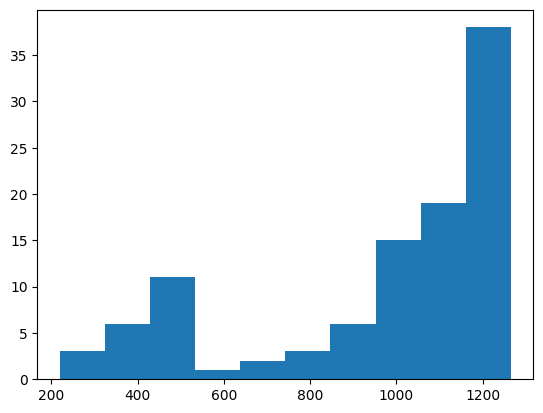

In [265]:
n, bins, patches = plt.hist(max_rd_latency_64)
plt.show()

[333.49344978165936, 350.103734439834, 421.14285714285717, 525.7370517928287, 1005.4065040650406]


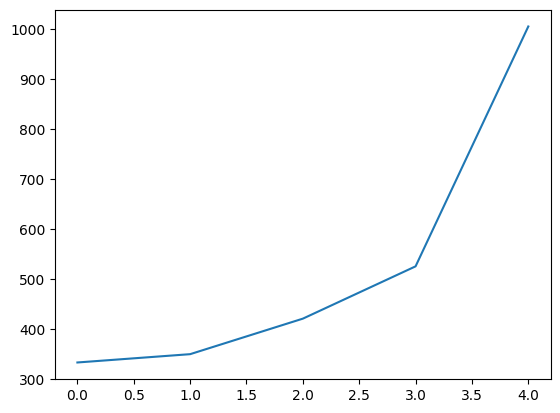

In [297]:
all_maxs = [max_rd_latency_4, max_rd_latency_8, max_rd_latency_12, max_rd_latency_16, max_rd_latency_32]
plt.plot([arr.mean() for arr in all_maxs])
print([arr.mean() for arr in all_maxs])
# plt.xticks([4,8,12,16,32],[4,8,12,16,32])
plt.show()

In [ ]:
df.to_pickle(f"lat_{N}.pkl")

In [163]:
def analyze(df, cutoff=None):
    rd_aves = []
    rd_maxs = []
    for g, latencies in df.groupby('round'):
        if cutoff and g > cutoff:
            break
        print(g)
        rd_aves.append(latencies['lat'].mean())
        rd_maxs.append(latencies['lat'].max())
    return (rd_aves,rd_maxs)

In [165]:
aves, maxs = analyze(df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


125

In [117]:
# filtered_df[filtered_df['message'].str.contains('Paxos:')]